<h2> Nama : Gulfi Oktariani </h2>
<h2> Nim : 09011381823118 </h2>

<h2>1. PCA for Data Visualization</h2>

In [1]:
import pandas as pd

In [3]:
sp = pd.read_csv('StudentsPerformance.csv')
sp.tail(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


<h3>1.1. Standardize the Data</h3>
 (mean = 0 and variance = 1)

In [5]:
from sklearn.preprocessing import StandardScaler
features = ['math score', 'reading score', 'writing score'] 
# Separating out the features
x = sp.loc[:, features].values 
# Separating out the target
y = sp.loc[:,['gender']].values 

In [6]:
print (x)

[[72 72 74]
 [69 90 88]
 [90 95 93]
 ...
 [59 71 65]
 [68 78 77]
 [77 86 86]]


In [7]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [8]:
print (x)

[[ 0.39002351  0.19399858  0.39149181]
 [ 0.19207553  1.42747598  1.31326868]
 [ 1.57771141  1.77010859  1.64247471]
 ...
 [-0.46775108  0.12547206 -0.20107904]
 [ 0.12609287  0.60515772  0.58901542]
 [ 0.71993682  1.15336989  1.18158627]]


<h3>1.2. PCA Projection to 2D</h3>

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,columns = ['principal component 1', 'principal component 2'])

In [10]:
finalDf = pd.concat([principalDf, sp[['gender']]], axis = 1)
print(finalDf)

     principal component 1  principal component 2  gender
0                -0.560514               0.088285  female
1                -1.719201              -0.910745  female
2                -2.883135              -0.021999  female
3                 2.119921              -0.074994    male
4                -0.988094               0.131914    male
..                     ...                    ...     ...
995              -3.048891              -0.286078  female
996               1.226753               0.489492    male
997               0.303449              -0.348515  female
998              -0.772545              -0.362672  female
999              -1.773059              -0.317637  female

[1000 rows x 3 columns]


<h3>1.3. Visualize 2D Projection</h3>

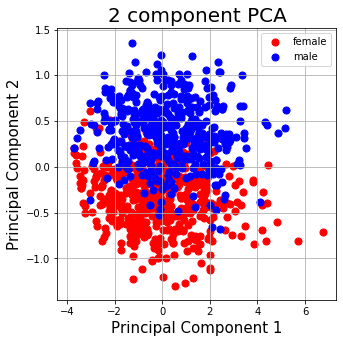

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['female', 'male']
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['gender'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()
plt.show()

In [13]:
pca.explained_variance_ratio_

array([0.90614325, 0.07886171])

<h2>2. PCA to Speed-up Machine Learning Algorithms</h2>

<h3>2.1.Download and Load the Data</h3>

In [14]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

<h3>2.2. Split Data into Training and Test Sets</h3>

In [15]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

<h3>2.3. Standardize the Data</h3>

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()# Fit on training set only.
scaler.fit(train_img)# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [17]:
train_img.shape

(60000, 784)

<h3>2.4. Import and Apply PCA</h3>

In [18]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [19]:
pca.fit(train_img)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [20]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [21]:
train_img.shape

(60000, 327)

<h3>2.5. Apply Logistic Regression to the Transformed Data</h3>

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [24]:
logisticRegr.fit(train_img, train_lbl)

C:\Users\Gulfi Oktariani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Gulfi Oktariani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gulfi Oktariani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gulfi Oktariani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gulfi Oktariani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lb

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

In [26]:
# Predict for One Observation (image)
logisticRegr.predict(test_img[0:10])

array(['0', '4', '1', '2', '4', '4', '7', '1', '1', '7'], dtype=object)

In [27]:
logisticRegr.score(test_img, test_lbl)

0.9117